# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







Models-   
Algorithms- going through and fitting the model to find the ideal beta. Determines the specifics of the model.

# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

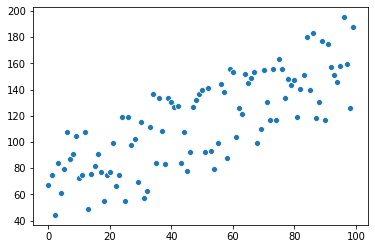

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1092.065381
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 1093.878370
[1.92900688 2.37964862]
Iteration 2 | Cost: 1095.704909
[1.92652148 1.53108725]
Iteration 3 | Cost: 1097.545091
[1.94965991 2.38221419]
Iteration 4 | Cost: 1099.399008
[1.94708444 1.52789053]
Iteration 5 | Cost: 1101.266752
[1.97030685 2.3847994 ]
Iteration 6 | Cost: 1103.148418
[1.96764072 1.5246743 ]
Iteration 7 | Cost: 1105.044098
[1.99094771 2.38740437]
Iteration 8 | Cost: 1106.953889
[1.98819034 1.52143843]
Iteration 9 | Cost: 1108.877885
[2.01158249 2.39002924]
Iteration 10 | Cost: 1110.816183
[2.00873327 1.51818279]
Iteration 11 | Cost: 1112.768880
[2.0322112  2.39267414]
Iteration 12 | Cost: 1114.736072
[2.02926954 1.51490725]
Iteration 13 | Cost: 1116.717858
[2.05283384 2.39533921]
Iteration 14 | Cost: 1118.714336
[2.04979913 1.51161165]
Iteration 15 | Cost: 1120.725607
[2.07345042 2.39802458]
Iteration 16 | Cost: 1122.751770
[2.07032205 1.50829588]
Iteration 17 | Cost: 1124.792926
[2.09406

[5.46147258 0.49436137]
Iteration 357 | Cost: 4019.510354
[5.51375863 3.31524502]
Iteration 358 | Cost: 4041.624594
[5.48083619 0.4845033 ]
Iteration 359 | Cost: 4063.890140
[5.53340809 3.32454734]
Iteration 360 | Cost: 4086.308021
[5.50019278 0.47458036]
Iteration 361 | Cost: 4108.879271
[5.5530525  3.33391493]
Iteration 362 | Cost: 4131.604930
[5.51954236 0.46459211]
Iteration 363 | Cost: 4154.486047
[5.57269186 3.34334823]
Iteration 364 | Cost: 4177.523678
[5.5388849  0.45453812]
Iteration 365 | Cost: 4200.718885
[5.59232618 3.35284769]
Iteration 366 | Cost: 4224.072738
[5.55822041 0.44441792]
Iteration 367 | Cost: 4247.586315
[5.61195548 3.36241375]
Iteration 368 | Cost: 4271.260699
[5.57754889 0.43423107]
Iteration 369 | Cost: 4295.096984
[5.63157976 3.37204688]
Iteration 370 | Cost: 4319.096267
[5.59687032 0.42397712]
Iteration 371 | Cost: 4343.259657
[5.65119903 3.38174751]
Iteration 372 | Cost: 4367.588266
[5.61618471 0.41365561]
Iteration 373 | Cost: 4392.083217
[5.67081329 3.

Iteration 724 | Cost: 40006.513730
[ 8.89860259 -3.04289082]
Iteration 725 | Cost: 40273.434776
[9.05559931 6.7590949 ]
Iteration 726 | Cost: 40542.169729
[ 8.91652931 -3.07640016]
Iteration 727 | Cost: 40812.730909
[9.07452691 6.79216129]
Iteration 728 | Cost: 41085.130720
[ 8.93444692 -3.11013513]
Iteration 729 | Cost: 41359.381649
[9.09345222 6.82545425]
Iteration 730 | Cost: 41635.496268
[ 8.95235541 -3.14409725]
Iteration 731 | Cost: 41913.487235
[9.11237527 6.8589753 ]
Iteration 732 | Cost: 42193.367294
[ 8.97025475 -3.17828806]
Iteration 733 | Cost: 42475.149276
[9.13129608 6.892726  ]
Iteration 734 | Cost: 42758.846097
[ 8.98814491 -3.21270913]
Iteration 735 | Cost: 43044.470764
[9.15021468 6.9267079 ]
Iteration 736 | Cost: 43332.036369
[ 9.00602588 -3.24736202]
Iteration 737 | Cost: 43621.556095
[9.16913109 6.96092258]
Iteration 738 | Cost: 43913.043215
[ 9.02389764 -3.28224829]
Iteration 739 | Cost: 44206.511089
[9.18804534 6.99537161]
Iteration 740 | Cost: 44501.973172
[ 9.0

Iteration 1226 | Cost: 1176504.211675
[ 13.01989882 -24.97375395]
Iteration 1227 | Cost: 1184490.646241
[13.83658397 28.62988257]
Iteration 1228 | Cost: 1192531.325246
[ 13.03420913 -25.15574043]
Iteration 1229 | Cost: 1200626.617116
[13.85638063 28.81197108]
Iteration 1230 | Cost: 1208776.892780
[ 13.04849555 -25.33896113]
Iteration 1231 | Cost: 1216982.525684
[13.87619068 28.99529816]
Iteration 1232 | Cost: 1225243.891815
[ 13.06275796 -25.52342444]
Iteration 1233 | Cost: 1233561.369708
[13.89601426 29.17987221]
Iteration 1234 | Cost: 1241935.340474
[ 13.07699624 -25.70913879]
Iteration 1235 | Cost: 1250366.187810
[13.9158515  29.36570171]
Iteration 1236 | Cost: 1258854.298019
[ 13.09121025 -25.89611268]
Iteration 1237 | Cost: 1267400.060029
[13.93570252 29.55279518]
Iteration 1238 | Cost: 1276003.865407
[ 13.10539987 -26.08435467]
Iteration 1239 | Cost: 1284666.108384
[13.95556745 29.7411612 ]
Iteration 1240 | Cost: 1293387.185864
[ 13.11956497 -26.27387336]
Iteration 1241 | Cost: 1

Iteration 1700 | Cost: 29094426.435837
[  15.31356654 -131.36690088]
Iteration 1701 | Cost: 29292030.823860
[ 19.34139362 135.26603609]
Iteration 1702 | Cost: 29490977.334912
[  15.31578219 -132.27108878]
Iteration 1703 | Cost: 29691275.084646
[ 19.37090988 136.17281089]
Iteration 1704 | Cost: 29892933.250629
[  15.31790038 -133.18141621]
Iteration 1705 | Cost: 30095961.072761
[ 19.40051411 137.08574617]
Iteration 1706 | Cost: 30300367.853701
[  15.31992047 -134.09792485]
Iteration 1707 | Cost: 30506162.959290
[ 19.43020694 138.00488377]
Iteration 1708 | Cost: 30713355.818981
[  15.32184183 -135.0206567 ]
Iteration 1709 | Cost: 30921955.926273
[ 19.45998902 138.93026581]
Iteration 1710 | Cost: 31131972.839143
[  15.32366383 -135.94965401]
Iteration 1711 | Cost: 31343416.180487
[ 19.48986099 139.86193472]
Iteration 1712 | Cost: 31556295.638557
[  15.32538583 -136.88495934]
Iteration 1713 | Cost: 31770620.967411
[ 19.51982348 140.79993318]
Iteration 1714 | Cost: 31986401.987353
[  15.327

Iteration 2090 | Cost: 407662712.103815
[  12.80774282 -496.51461949]
Iteration 2091 | Cost: 410431539.708881
[ 27.86273381 501.56112661]
Iteration 2092 | Cost: 413219173.097719
[  12.77164411 -499.89855726]
Iteration 2093 | Cost: 416025739.998578
[ 27.92883513 504.95608623]
Iteration 2094 | Cost: 418851369.007225
[  12.7351943  -503.30547702]
Iteration 2095 | Cost: 421696189.592851
[ 27.99527949 508.37410591]
Iteration 2096 | Cost: 424560332.103995
[  12.69839102 -506.73553487]
Iteration 2097 | Cost: 427443927.774519
[ 28.06206926 511.81534225]
Iteration 2098 | Cost: 430347108.729621
[  12.66123192 -510.18888796]
Iteration 2099 | Cost: 433270007.991888
[ 28.12920683 515.27995295]
Iteration 2100 | Cost: 436212759.487394
[  12.62371461 -513.66569451]
Iteration 2101 | Cost: 439175498.051834
[ 28.19669458 518.76809676]
Iteration 2102 | Cost: 442158359.436700
[  12.58583669 -517.16611382]
Iteration 2103 | Cost: 445161480.315506
[ 28.26453492 522.27993352]
Iteration 2104 | Cost: 448184998.2

[  51.35985058 1872.82416822]
Iteration 2482 | Cost: 5790006660.282516
[   -5.1508599  -1875.89575134]
Iteration 2483 | Cost: 5829332185.558163
[  51.56549912 1885.53300209]
Iteration 2484 | Cost: 5868924808.467443
[   -5.32908005 -1888.6480952 ]
Iteration 2485 | Cost: 5908786343.128412
[  51.7724447  1898.32815543]
Iteration 2486 | Cost: 5948918615.980552
[   -5.50861036 -1901.48705103]
Iteration 2487 | Cost: 5989323465.868491
[  51.98069618 1911.21021452]
Iteration 2488 | Cost: 6030002744.126184
[   -5.68945969 -1914.41320712]
Iteration 2489 | Cost: 6070958314.661821
[  52.19026246 1924.17976962]
Iteration 2490 | Cost: 6112192054.043163
[   -5.87163697 -1927.42715571]
Iteration 2491 | Cost: 6153705851.583583
[  52.40115248 1937.23741499]
Iteration 2492 | Cost: 6195501609.428576
[   -6.05515118 -1940.52949311]
Iteration 2493 | Cost: 6237581242.642972
[  52.61337529 1950.38374896]
Iteration 2494 | Cost: 6279946679.298639
[   -6.24001139 -1953.72081963]
Iteration 2495 | Cost: 6322599860

Iteration 2915 | Cost: 108539302190.725861
[ 148.65427129 8130.66985325]
Iteration 2916 | Cost: 109276497444.397964
[  -96.87143925 -8155.04601849]
Iteration 2917 | Cost: 110018699703.214661
[ 149.49981164 8185.88207816]
Iteration 2918 | Cost: 110765942974.585022
[  -97.69354781 -8210.44582237]
Iteration 2919 | Cost: 111518261496.895370
[ 150.35100164 8241.46930404]
Iteration 2920 | Cost: 112275689741.077759
[  -98.52133332 -8266.22189844]
Iteration 2921 | Cost: 113038262412.189743
[ 151.2078797  8297.43407787]
Iteration 2922 | Cost: 113806014451.004349
[  -99.35483431 -8322.37680232]
Iteration 2923 | Cost: 114578981035.611465
[ 152.07048447 8353.77896396]
Iteration 2924 | Cost: 115357197583.028946
[ -100.19408956 -8378.91310699]
Iteration 2925 | Cost: 116140699750.825974
[ 152.93885488 8410.506544  ]
Iteration 2926 | Cost: 116929523438.757050
[ -101.03913813 -8435.83340292]
Iteration 2927 | Cost: 117723704790.405899
[ 153.81303013 8467.61941724]
Iteration 2928 | Cost: 118523280194.843

Iteration 3299 | Cost: 1460318864117.069336
[  478.08859398 29819.08270266]
Iteration 3300 | Cost: 1470237300279.184326
[  -422.51969749 -29917.06162899]
Iteration 3301 | Cost: 1480223102123.104492
[  481.1542602  30021.60215364]
Iteration 3302 | Cost: 1490276727194.251221
[  -425.57097615 -30120.26804234]
Iteration 3303 | Cost: 1500398636145.683838
[  484.24066047 30225.49711117]
Iteration 3304 | Cost: 1510589292759.198975
[  -428.64306682 -30324.85462544]
Iteration 3305 | Cost: 1520849163966.587402
[  487.34793565 30430.77691767]
Iteration 3306 | Cost: 1531178719871.020508
[  -431.73611084 -30530.83075233]
Iteration 3307 | Cost: 1541578433768.595703
[  490.47622754 30637.45097896]
Iteration 3308 | Cost: 1552048782170.019775
[  -434.85025049 -30738.20586077]
Iteration 3309 | Cost: 1562590244822.446533
[  493.62567891 30845.52876479]
Iteration 3310 | Cost: 1573203304731.455078
[  -437.98562902 -30946.98945259]
Iteration 3311 | Cost: 1583888448183.182129
[  496.79643352 31055.0198092 ]


Iteration 3722 | Cost: 25583401065452.945312
[  -1850.52956725 -124802.02969711]
Iteration 3723 | Cost: 25757162657243.816406
[  1919.06708728 125228.17636105]
Iteration 3724 | Cost: 25932104431869.050781
[  -1863.29778409 -125649.69132287]
Iteration 3725 | Cost: 26108234405090.386719
[  1931.90180184 126078.71141   ]
Iteration 3726 | Cost: 26285560647112.386719
[  -1876.1528045  -126503.11023639]
Iteration 3727 | Cost: 26464091282952.160156
[  1944.82360708 126935.02326537]
Iteration 3728 | Cost: 26643834492811.675781
[  -1889.09521804 -127362.32554096]
Iteration 3729 | Cost: 26824798512452.433594
[  1957.83309454 127797.15116304]
Iteration 3730 | Cost: 27006991633573.074219
[  -1902.12561823 -128227.37660549]
Iteration 3731 | Cost: 27190422204189.179688
[  1970.93085978 128665.13460537]
Iteration 3732 | Cost: 27375098629015.683594
[  -1915.24460267 -129098.30306625]
Iteration 3733 | Cost: 27561029369852.093750
[  1984.11750241 129539.01336302]
Iteration 3734 | Cost: 27748222945970.22

[  -7657.80265866 -510142.91831686]
Iteration 4139 | Cost: 430358529794689.250000
[  7750.70456432 511875.3910999 ]
Iteration 4140 | Cost: 433281510323656.250000
[  -7710.03025494 -513607.8019306 ]
Iteration 4141 | Cost: 436224343637175.937500
[  7803.13098759 515352.02115931]
Iteration 4142 | Cost: 439187164574688.375000
[  -7762.61265643 -517096.21891508]
Iteration 4143 | Cost: 442170108891456.750000
[  7855.91341221 518852.26437326]
Iteration 4144 | Cost: 445173313264790.500000
[  -7815.55227294 -520608.32910818]
Iteration 4145 | Cost: 448196915300305.687500
[  7909.05425616 522376.28112149]
Iteration 4146 | Cost: 451241053538231.812500
[  -7868.85153062 -524144.29343335]
Iteration 4147 | Cost: 454305867459758.937500
[  7962.55595381 525924.23287304]
Iteration 4148 | Cost: 457391497493428.250000
[  -7922.51287214 -527704.27390705]
Iteration 4149 | Cost: 460498085021566.750000
[  8016.42095612 529496.28219364]
Iteration 4150 | Cost: 463625772386766.062500
[  -7976.53875672 -531288.43

Iteration 4537 | Cost: 6365719030117345.000000
[  29716.15249943 1968665.08610222]
Iteration 4538 | Cost: 6408954777731786.000000
[  -29745.74608367 -1975336.42138815]
Iteration 4539 | Cost: 6452484181076698.000000
[  29917.75261004 1982036.18255442]
Iteration 4540 | Cost: 6496309234651843.000000
[  -29948.0092065  -1988752.84932378]
Iteration 4541 | Cost: 6540431946503540.000000
[  30120.72190923 1995498.09504104]
Iteration 4542 | Cost: 6584854338316708.000000
[  -30151.64616611 -2002260.40118153]
Iteration 4543 | Cost: 6629578445507465.000000
[  30325.06969651 2009051.44038148]
Iteration 4544 | Cost: 6674606317316429.000000
[  -30356.66629354 -2015859.69587199]
Iteration 4545 | Cost: 6719940016902592.000000
[  30530.80533453 2022696.83958461]
Iteration 4546 | Cost: 6765581621437812.000000
[  -30563.07898319 -2029551.35650936]
Iteration 4547 | Cost: 6811533222202062.000000
[  30737.93824957 2036434.91787711]
Iteration 4548 | Cost: 6857796924679210.000000
[  -30770.89369328 -2043336.01

Iteration 4923 | Cost: 86813570912919904.000000
[ 109645.69924309 7270121.71195395]
Iteration 4924 | Cost: 87403205740303904.000000
[ -109942.43918112 -7294766.29510068]
Iteration 4925 | Cost: 87996845347424688.000000
[ 110390.16453213 7319500.12209437]
Iteration 4926 | Cost: 88594516934610272.000000
[ -110689.40911009 -7344312.11000426]
Iteration 4927 | Cost: 89196247886932416.000000
[ 111139.68613583 7369213.90872171]
Iteration 4928 | Cost: 89802065775461312.000000
[ -111441.45250179 -7394194.43840017]
Iteration 4929 | Cost: 90411998358529152.000000
[ 111894.29839652 7419265.34970167]
Iteration 4930 | Cost: 91026073583001344.000000
[ -112198.60381496 -7444415.56587663]
Iteration 4931 | Cost: 91644319585557728.000000
[ 112654.03588979 7469656.73837117]
Iteration 4932 | Cost: 92266764693981696.000000
[ -112960.89774244 -7494977.79354548]
Iteration 4933 | Cost: 92893437428457744.000000
[ 113418.93342607 7520390.38364337]
Iteration 4934 | Cost: 93524366502878432.000000
[ -113728.36921264

Iteration 5298 | Cost: 1098982104228101504.000000
[  -389943.06426681 -25866821.92695636]
Iteration 5299 | Cost: 1106446353383050112.000000
[  391343.55963163 25954519.35610402]
Iteration 5300 | Cost: 1113961299464937856.000000
[  -392591.80135253 -26042508.51323076]
Iteration 5301 | Cost: 1121527286805572992.000000
[  394001.29474808 26130801.56112541]
Iteration 5302 | Cost: 1129144662075453568.000000
[  -395258.52863511 -26219388.35683572]
Iteration 5303 | Cost: 1136813774299651072.000000
[  396677.08104679 26308281.06890167]
Iteration 5304 | Cost: 1144534974873804288.000000
[  -397943.36830335 -26397469.5623346 ]
Iteration 5305 | Cost: 1152308617580215296.000000
[  399371.04113079 26486966.01147246]
Iteration 5306 | Cost: 1160135058604070656.000000
[  -400646.44337593 -26576760.28933659]
Iteration 5307 | Cost: 1168014656549747200.000000
[  402083.29843583 26666864.57611004]
Iteration 5308 | Cost: 1175947772457254656.000000
[  -403367.87770707 -26757268.75287068]
Iteration 5309 | Cos

Iteration 5632 | Cost: 10540573131070670848.000000
[ -1207722.10766188 -80108738.34027544]
Iteration 5633 | Cost: 10612164346053658624.000000
[ 1211898.02755319 80380328.63231146]
Iteration 5634 | Cost: 10684241806139168768.000000
[ -1215925.18275147 -80652834.18182272]
Iteration 5635 | Cost: 10756808813887434752.000000
[ 1220128.93027492 80926269.08700603]
Iteration 5636 | Cost: 10829868694289575936.000000
[ -1224183.97290991 -81200625.50385955]
Iteration 5637 | Cost: 10903424794919940096.000000
[ 1228415.73694739 81475917.55074197]
Iteration 5638 | Cost: 10977480486089435136.000000
[ -1232498.85655202 -81752137.40596402]
Iteration 5639 | Cost: 11052039161000075264.000000
[ 1236758.82726834 82029299.20819062]
Iteration 5640 | Cost: 11127104235900354560.000000
[ -1240870.21466282 -82307395.15818954]
Iteration 5641 | Cost: 11202679150241806336.000000
[ 1245158.58351444 82586439.41507703]
Iteration 5642 | Cost: 11278767366836633600.000000
[ -1249298.43081497 -82866424.202223  ]
Iteration

[4.15421376e+06 2.75538757e+08]
Iteration 5998 | Cost: 125547929178771718144.000000
[-4.16821301e+06 -2.76472896e+08]
Iteration 5999 | Cost: 126400646452940881920.000000
[4.18242876e+06 2.77410207e+08]
Iteration 6000 | Cost: 127259155353896796160.000000
[-4.19652364e+06 -2.78350690e+08]
Iteration 6001 | Cost: 128123495218172116992.000000
[4.21083540e+06 2.79294368e+08]
Iteration 6002 | Cost: 128993705649471913984.000000
[-4.22502657e+06 -2.80241239e+08]
Iteration 6003 | Cost: 129869826520488181760.000000
[4.23943497e+06 2.81191325e+08]
Iteration 6004 | Cost: 130751897974727081984.000000
[-4.25372309e+06 -2.82144628e+08]
Iteration 6005 | Cost: 131639960428347604992.000000
[4.26822879e+06 2.83101167e+08]
Iteration 6006 | Cost: 132534054572014223360.000000
[-4.28261451e+06 -2.84060944e+08]
Iteration 6007 | Cost: 133434221372761047040.000000
[4.29721818e+06 2.85023981e+08]
Iteration 6008 | Cost: 134340502075868856320.000000
[-4.31170216e+06 -2.85990277e+08]
Iteration 6009 | Cost: 135252938

[-1.62495425e+07 -1.07780594e+09]
Iteration 6401 | Cost: 1920990915445876326400.000000
[1.63047200e+07 1.08145995e+09]
Iteration 6402 | Cost: 1934038220549493620736.000000
[-1.63599091e+07 -1.08512636e+09]
Iteration 6403 | Cost: 1947174142506581622784.000000
[1.64154608e+07 1.08880519e+09]
Iteration 6404 | Cost: 1960399283199795265536.000000
[-1.64710254e+07 -1.09249650e+09]
Iteration 6405 | Cost: 1973714248599766040576.000000
[1.65269538e+07 1.09620032e+09]
Iteration 6406 | Cost: 1987119648792852037632.000000
[-1.65828963e+07 -1.09991670e+09]
Iteration 6407 | Cost: 2000616098009102942208.000000
[1.66392040e+07 1.10364568e+09]
Iteration 6408 | Cost: 2014204214650389921792.000000
[-1.66955271e+07 -1.10738729e+09]
Iteration 6409 | Cost: 2027884621318756237312.000000
[1.67522166e+07 1.11114160e+09]
Iteration 6410 | Cost: 2041657944844931170304.000000
[-1.68089228e+07 -1.11490863e+09]
Iteration 6411 | Cost: 2055524816317059956736.000000
[1.68659968e+07 1.11868844e+09]
Iteration 6412 | Cost

Iteration 6820 | Cost: 32754949159897855426560.000000
[-6.73267570e+07 -4.46566614e+09]
Iteration 6821 | Cost: 32977419662962901123072.000000
[6.75551014e+07 4.48080580e+09]
Iteration 6822 | Cost: 33201401178134669164544.000000
[-6.77840383e+07 -4.49599679e+09]
Iteration 6823 | Cost: 33426903968156005433344.000000
[6.80139331e+07 4.51123928e+09]
Iteration 6824 | Cost: 33653938365474130624512.000000
[-6.82444255e+07 -4.52653345e+09]
Iteration 6825 | Cost: 33882514772713770319872.000000
[6.84758811e+07 4.54187947e+09]
Iteration 6826 | Cost: 34112643663154068324352.000000
[-6.87079397e+07 -4.55727751e+09]
Iteration 6827 | Cost: 34344335581208142413824.000000
[6.89409667e+07 4.57272776e+09]
Iteration 6828 | Cost: 34577601142906620477440.000000
[-6.91746019e+07 -4.58823038e+09]
Iteration 6829 | Cost: 34812451036383550636032.000000
[6.94092111e+07 4.60378557e+09]
Iteration 6830 | Cost: 35048896022366753128448.000000
[-6.96444338e+07 -4.61939349e+09]
Iteration 6831 | Cost: 3528694693467035323

Iteration 7234 | Cost: 539920530260596113801216.000000
[-2.73347037e+08 -1.81306222e+10]
Iteration 7235 | Cost: 543587652178443455430656.000000
[2.74273841e+08 1.81920893e+10]
Iteration 7236 | Cost: 547279681063902504812544.000000
[-2.75203601e+08 -1.82537647e+10]
Iteration 7237 | Cost: 550996786084252187885568.000000
[2.76136700e+08 1.83156493e+10]
Iteration 7238 | Cost: 554739137555750881067008.000000
[-2.77072774e+08 -1.83777437e+10]
Iteration 7239 | Cost: 558506906951436944277504.000000
[2.78012210e+08 1.84400486e+10]
Iteration 7240 | Cost: 562300266908987974221824.000000
[-2.78954644e+08 -1.85025647e+10]
Iteration 7241 | Cost: 566119391238632201256960.000000
[2.79900460e+08 1.85652928e+10]
Iteration 7242 | Cost: 569964454931111962738688.000000
[-2.80849294e+08 -1.86282335e+10]
Iteration 7243 | Cost: 573835634165697709342720.000000
[2.81801534e+08 1.86913876e+10]
Iteration 7244 | Cost: 577733106318266503004160.000000
[-2.82756814e+08 -1.87547558e+10]
Iteration 7245 | Cost: 58165704

[7.83148730e+08 5.19448486e+10]
Iteration 7546 | Cost: 4461995599485030920880128.000000
[-7.85803694e+08 -5.21209539e+10]
Iteration 7547 | Cost: 4492301322166680940445696.000000
[7.88467849e+08 5.22976562e+10]
Iteration 7548 | Cost: 4522812880288286496522240.000000
[-7.91140846e+08 -5.24749576e+10]
Iteration 7549 | Cost: 4553531671877163245633536.000000
[7.93823096e+08 5.26528601e+10]
Iteration 7550 | Cost: 4584459104455975438909440.000000
[-7.96514248e+08 -5.28313658e+10]
Iteration 7551 | Cost: 4615596595107262973870080.000000
[7.99214715e+08 5.30104766e+10]
Iteration 7552 | Cost: 4646945570538309896110080.000000
[-8.01924146e+08 -5.31901946e+10]
Iteration 7553 | Cost: 4678507467146575004827648.000000
[8.04642954e+08 5.33705219e+10]
Iteration 7554 | Cost: 4710283731085458539544576.000000
[-8.07370788e+08 -5.35514606e+10]
Iteration 7555 | Cost: 4742275818330607885221888.000000
[8.10108061e+08 5.37330127e+10]
Iteration 7556 | Cost: 4774485194746586202112000.000000
[-8.12854423e+08 -5.39

[-2.90191149e+09 -1.92478592e+11]
Iteration 7933 | Cost: 61264519773656009662267392.000000
[2.91174975e+09 1.93131140e+11]
Iteration 7934 | Cost: 61680626312779318150823936.000000
[-2.92162118e+09 -1.93785900e+11]
Iteration 7935 | Cost: 62099559033394716775284736.000000
[2.93152626e+09 1.94442880e+11]
Iteration 7936 | Cost: 62521337130830826643128320.000000
[-2.94146473e+09 -1.95102087e+11]
Iteration 7937 | Cost: 62945979930790516527988736.000000
[2.95143709e+09 1.95763529e+11]
Iteration 7938 | Cost: 63373506890236215888445440.000000
[-2.96144306e+09 -1.96427214e+11]
Iteration 7939 | Cost: 63803937598281043272531968.000000
[2.97148315e+09 1.97093149e+11]
Iteration 7940 | Cost: 64237291777087081547825152.000000
[-2.98155708e+09 -1.97761341e+11]
Iteration 7941 | Cost: 64673589282768497854644224.000000
[2.99166536e+09 1.98431798e+11]
Iteration 7942 | Cost: 65112850106301587046531072.000000
[-3.00180771e+09 -1.99104529e+11]
Iteration 7943 | Cost: 65555094374440656286253056.000000
[3.011984

[-1.13896903e+10 -7.55457752e+11]
Iteration 8337 | Cost: 943766445061317915930787840.000000
[1.14283042e+10 7.58018932e+11]
Iteration 8338 | Cost: 950176474726873528734318592.000000
[-1.14670487e+10 -7.60588795e+11]
Iteration 8339 | Cost: 956630041096374681350438912.000000
[1.15059248e+10 7.63167371e+11]
Iteration 8340 | Cost: 963127439869640158589485056.000000
[-1.15449325e+10 -7.65754689e+11]
Iteration 8341 | Cost: 969668968754866167845224448.000000
[1.15840727e+10 7.68350778e+11]
Iteration 8342 | Cost: 976254927482275264125206528.000000
[-1.16233453e+10 -7.70955668e+11]
Iteration 8343 | Cost: 982885617817848013331103744.000000
[1.16627513e+10 7.73569390e+11]
Iteration 8344 | Cost: 989561343577149213539041280.000000
[-1.17022907e+10 -7.76191973e+11]
Iteration 8345 | Cost: 996282410639248949157822464.000000
[1.17419643e+10 7.78823447e+11]
Iteration 8346 | Cost: 1003049126960737103575515136.000000
[-1.17817723e+10 -7.81463843e+11]
Iteration 8347 | Cost: 1009861802589834491390328832.000

Iteration 8711 | Cost: 11866640644453006391635869696.000000
[4.05241038e+10 2.68789118e+12]
Iteration 8712 | Cost: 11947238464983164344252497920.000000
[-4.06614900e+10 -2.69700376e+12]
Iteration 8713 | Cost: 12028383703175047502930903040.000000
[4.07993422e+10 2.70614724e+12]
Iteration 8714 | Cost: 12110080077070867007744770048.000000
[-4.09376615e+10 -2.71532172e+12]
Iteration 8715 | Cost: 12192331329965583635713097728.000000
[4.10764499e+10 2.72452730e+12]
Iteration 8716 | Cost: 12275141230578539366872776704.000000
[-4.12157087e+10 -2.73376410e+12]
Iteration 8717 | Cost: 12358513573226078510816165888.000000
[4.13554398e+10 2.74303220e+12]
Iteration 8718 | Cost: 12442452177995417878437822464.000000
[-4.14956444e+10 -2.75233173e+12]
Iteration 8719 | Cost: 12526960890919636256518307840.000000
[4.16363245e+10 2.76166278e+12]
Iteration 8720 | Cost: 12612043584154022878679924736.000000
[-4.17774814e+10 -2.77102547e+12]
Iteration 8721 | Cost: 12697704156153336291970252800.000000
[4.1919117

Iteration 9106 | Cost: 171998879446251913001796894720.000000
[-1.54280960e+11 -1.02331796e+13]
Iteration 9107 | Cost: 173167089998197452128770850816.000000
[1.54804009e+11 1.02678725e+13]
Iteration 9108 | Cost: 174343234996565477055700926464.000000
[-1.55328831e+11 -1.03026830e+13]
Iteration 9109 | Cost: 175527368331846556288404160512.000000
[1.55855432e+11 1.03376115e+13]
Iteration 9110 | Cost: 176719544260554457094677331968.000000
[-1.56383819e+11 -1.03726585e+13]
Iteration 9111 | Cost: 177919817407710162173768499200.000000
[1.56913997e+11 1.04078242e+13]
Iteration 9112 | Cost: 179128242769346785842869305344.000000
[-1.57445973e+11 -1.04431092e+13]
Iteration 9113 | Cost: 180344875715028458419326550016.000000
[1.57979752e+11 1.04785138e+13]
Iteration 9114 | Cost: 181569771990387612029456220160.000000
[-1.58515340e+11 -1.05140384e+13]
Iteration 9115 | Cost: 182802987719678767887867183104.000000
[1.59052745e+11 1.05496835e+13]
Iteration 9116 | Cost: 184044579408350408344038539264.000000

Iteration 9495 | Cost: 2393784200298797488116634484736.000000
[5.75561879e+11 3.81759879e+13]
Iteration 9496 | Cost: 2410042701347601414499497672704.000000
[-5.77513169e+11 -3.83054135e+13]
Iteration 9497 | Cost: 2426411629583750327633050599424.000000
[5.79471075e+11 3.84352779e+13]
Iteration 9498 | Cost: 2442891735024955730698587602944.000000
[-5.81435619e+11 -3.85655826e+13]
Iteration 9499 | Cost: 2459483772783021034140348710912.000000
[5.83406823e+11 3.86963290e+13]
Iteration 9500 | Cost: 2476188503098438770952933212160.000000
[-5.85384710e+11 -3.88275187e+13]
Iteration 9501 | Cost: 2493006691375235791423195316224.000000
[5.87369303e+11 3.89591532e+13]
Iteration 9502 | Cost: 2509939108216044763753415180288.000000
[-5.89360623e+11 -3.90912339e+13]
Iteration 9503 | Cost: 2526986529457387062391979638784.000000
[5.91358695e+11 3.92237624e+13]
Iteration 9504 | Cost: 2544149736205250642139655700480.000000
[-5.93363541e+11 -3.93567403e+13]
Iteration 9505 | Cost: 256142951487086241146477110

Iteration 9921 | Cost: 42797145589296231820345567346688.000000
[2.43364331e+12 1.61419199e+14]
Iteration 9922 | Cost: 43087822349700285125300494270464.000000
[-2.44189393e+12 -1.61966448e+14]
Iteration 9923 | Cost: 43380473376796123210126001700864.000000
[2.45017253e+12 1.62515553e+14]
Iteration 9924 | Cost: 43675112079736033315787060019200.000000
[-2.45847920e+12 -1.63066519e+14]
Iteration 9925 | Cost: 43971751958746994666094836318208.000000
[2.46681402e+12 1.63619353e+14]
Iteration 9926 | Cost: 44270406605748923617352861351936.000000
[-2.47517710e+12 -1.64174061e+14]
Iteration 9927 | Cost: 44571089704977611558814916542464.000000
[2.48356854e+12 1.64730650e+14]
Iteration 9928 | Cost: 44873815033611743074405318656000.000000
[-2.49198842e+12 -1.65289126e+14]
Iteration 9929 | Cost: 45178596462404111459291913781248.000000
[2.50043685e+12 1.65849495e+14]
Iteration 9930 | Cost: 45485447956317283792890913357824.000000
[-2.50891392e+12 -1.66411764e+14]
Iteration 9931 | Cost: 45794383575163238

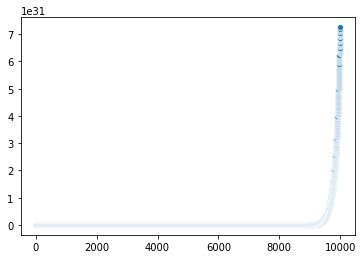

In [12]:
numEpochs= 10000
alpha = 0.00061
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

because you need to pass the global min 

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise